# Introduction

Le but de ce projet est de prédire la note d'un joueur de NBA sur le jeu vidéo NBA2K.  <br>
Ce jeu sort chaque année et octroie une note positive inférieure à 99 à chaque joueur de la ligue. <br>
Le jeu de données des données des joueurs de NBA est issu de Kaggle. Nous aurions pu l'obtenir nous-même à l'aide d'une requête au site Basketball reference, malheureusement, celui-ci limite fortement le nombre de requêtes. <br>
Nous ajouterons à ce jeu de données les notes des joueurs dans une partie ultérieure. <br>



In [1]:
# Bibliothèques
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt 
import shap

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# 1. Nettoyage des données et EDA (Analyse exploiratoire des données)

Avant d'appliquer un modèle de machine learning, il convient d'analyser les données pour bien comprendre les variables avec lesquels nous avons affaire. <br>

In [2]:
stats_originel = pd.read_csv("../Seasons_Stats.csv", encoding = "utf-8")
stats_originel

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,144,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,102,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,174,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,22,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
4,4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,21,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28052,28123,2022,Delon Wright,PG,28.0,SAC,27,8.0,696.0,104,...,12.7,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6
28053,28124,2022,Thaddeus Young,PF,32.0,CHI,68,23.0,1652.0,370,...,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
28054,28125,2022,Trae Young,PG,22.0,ATL,63,63.0,2125.0,487,...,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
28055,28126,2022,Cody Zeller,C,28.0,CHO,48,21.0,1005.0,181,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


Les variables sont multiples. On observe des valeurs manquantes. Voici le détail des valeurs manquantes du jeu de données. Certaines statistiques modernes n'apparaissent que plus tard (WS, VORP...). <br>
Voici un descriptif de certaines des variables utilisées dans ce jeu de données ;<br>

Pos: Position (Meneur : PG, Pivot : C, Aillier : F, Arrière : SG) <br>
Tm: Équipe <br>
G: Matchs joués <br>
GS: Matchs commencés <br>
MP: Minutes jouées <br>
FG: Tirs réussis <br>
FGA: Tirs tentés <br>
FG%: Pourcentage de tirs réussis <br>
TRB: Rebonds totaux <br>
AST: Passes décisives  <br>
STL: Interceptions <br>
BLK: Contres <br>
PTS: Points <br>
TOV%: Pourcentage de pertes de balle <br>
USG%: Pourcentage d'utilisation du joueur par l'équipe<br>
WS: Actions gagnantes totales (Combien de victoires peuvent-elles être attribuées à ce joueur ?)<br>
VORP: Valeur au-dessus d'un joueur "moyen" <br> ... 

In [3]:
stats_originel.isnull().sum()

Unnamed: 0       0
Year             0
Player           0
Pos              0
Age              8
Tm               0
G                0
GS            6391
MP             486
FG               0
FGA              0
FG%            115
3P            5697
3PA           5697
3P%           9425
2P               0
2PA              0
2P%            179
eFG%           115
FT               0
FTA              0
FT%           1050
ORB           3827
DRB           3827
TRB            312
AST              0
STL           3827
BLK           3827
TOV           4979
PF               0
PTS              0
PER            523
TS%            102
3PAr          5801
FTr            115
ORB%          3832
DRB%          3832
TRB%          3053
AST%          2069
STL%          3832
BLK%          3832
TOV%          5056
USG%          4984
OWS             39
DWS             39
WS              39
WS/48          523
OBPM          3827
DBPM          3827
BPM           3827
VORP          3827
dtype: int64

In [4]:
stats = stats_originel.dropna().drop(columns = "Unnamed: 0")
stats['PTS'] = stats['PTS'] / stats['G'] # On remplace les statistiques totales de la saison par leur moyenne 
stats['AST'] = stats['AST'] / stats['G']
stats['TRB'] = stats['TRB'] / stats['G']
stats['BLK'] = stats['BLK'] / stats['G']



On élimine les lignes où il existe des données manquantes, malgré cette élimination qui peut paraître "grossière", on obtient 17660 observations réparties entre 1980 et 2022. On ne considère donc pas les premières saisons de NBA (au style de jeu bien différent) tout en gardant un nombre d'observations conséquents. <br>

In [5]:
stats.describe()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,...,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000
mean,2004.498754,26.715798,52.730861,25.765855,1264.479841,204.687656,446.762571,0.439374,32.143148,91.129728,...,13.955119,19.290142,1.366444,1.257072,2.624009,0.075527,-1.116574,-0.464083,-1.580912,0.630351
std,11.739410,4.020536,24.245738,28.744768,885.202130,178.948168,373.880831,0.070533,44.712475,117.527016,...,4.858133,4.919366,2.074584,1.188931,2.963061,0.070337,2.870569,1.769011,3.551548,1.381920
min,1980.000000,18.000000,1.000000,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,4.200000,-3.300000,-1.000000,-2.100000,-0.720000,-24.700000,-14.200000,-31.100000,-2.100000
25%,1995.000000,24.000000,32.000000,1.000000,475.000000,60.000000,141.000000,0.403000,1.000000,6.000000,...,10.800000,15.900000,0.000000,0.300000,0.400000,0.040000,-2.700000,-1.600000,-3.500000,-0.200000
50%,2005.000000,26.000000,58.000000,12.000000,1150.000000,156.000000,352.000000,0.441000,11.000000,37.000000,...,13.400000,18.900000,0.700000,0.900000,1.700000,0.080000,-1.100000,-0.500000,-1.400000,0.100000
75%,2015.000000,29.000000,75.000000,50.000000,1966.000000,307.000000,668.000000,0.480000,49.000000,139.000000,...,16.400000,22.400000,2.100000,1.800000,3.900000,0.117000,0.600000,0.600000,0.600000,1.000000
max,2022.000000,43.000000,85.000000,83.000000,3533.000000,1098.000000,2279.000000,0.833000,402.000000,1028.000000,...,57.100000,56.200000,15.200000,9.100000,21.200000,0.521000,31.700000,9.200000,34.800000,12.400000


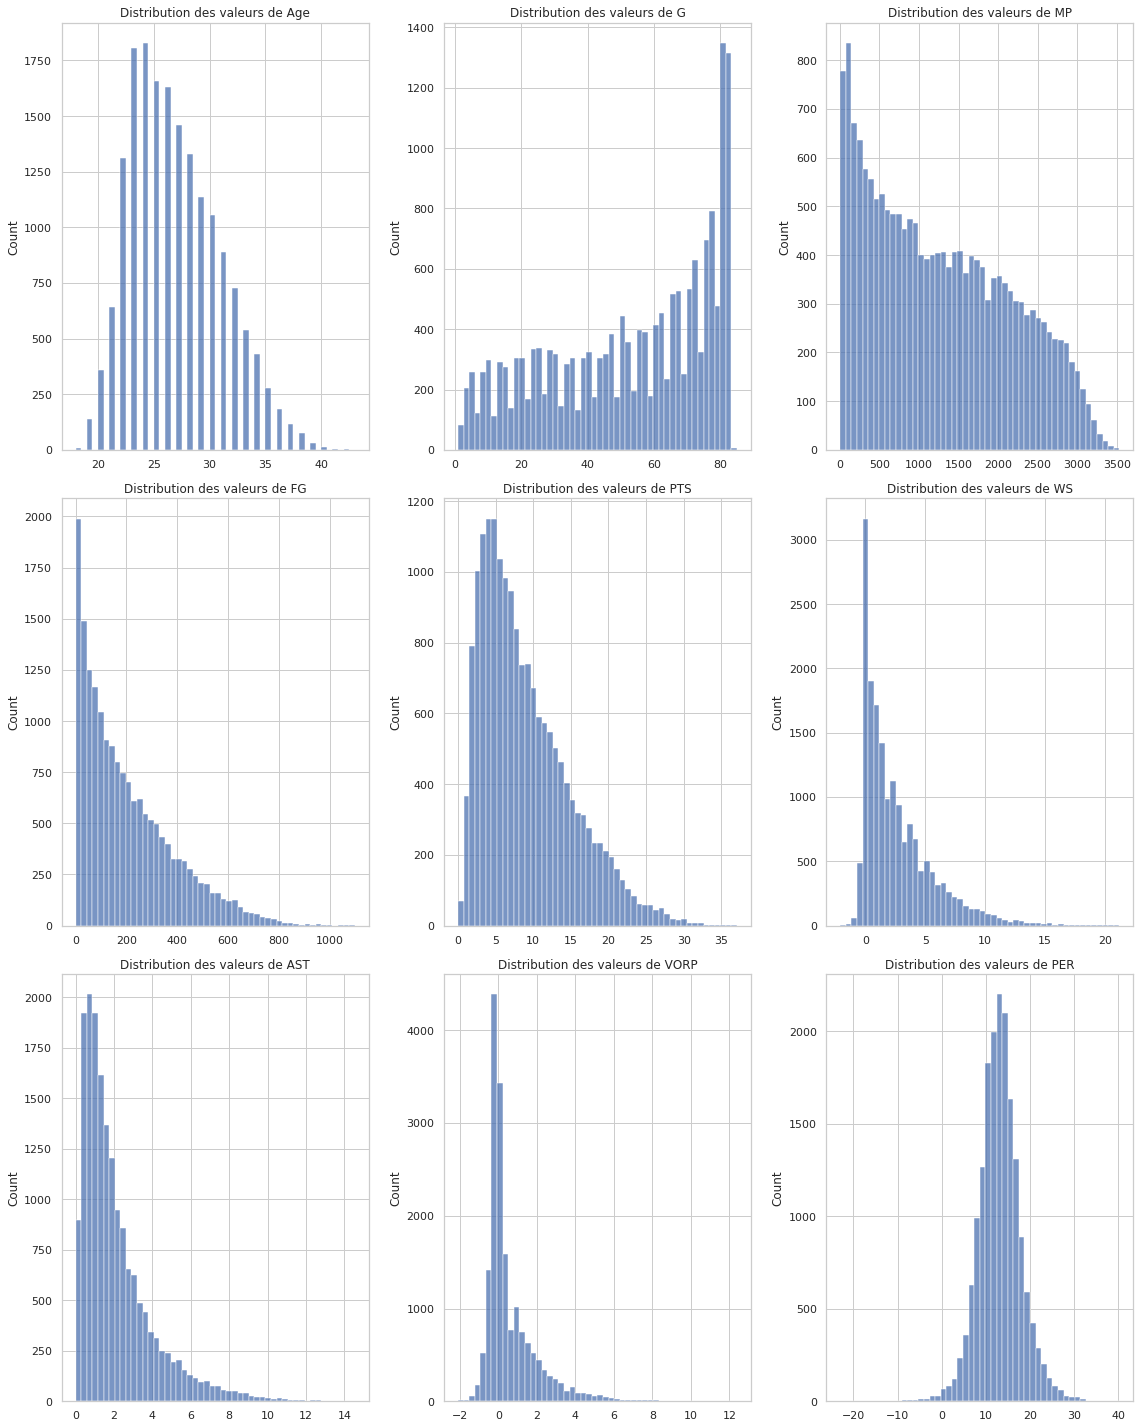

In [6]:
sns.set(style="whitegrid")



# Liste des variables à analyser
variables = ['Age', 'G', 'MP', 'FG', 'PTS', 'WS', 'AST', 'VORP', 'PER']

fig, axes = plt.subplots(3, 3, figsize=(16, 20))
colors = sns.load_dataset("iris")

for i, var in enumerate(variables):
    ligne = i // 3
    col = i % 3
    stats_to_plot = stats[var].values
    sns.histplot(stats_to_plot, bins=50, ax=axes[ligne, col])
    axes[ligne, col].set_title(f'Distribution des valeurs de {var}')

plt.tight_layout()


On peut alors se concentrer sur les points par match (PPG) sur l'ensemble de la NBA, on peut dans un premier temps examiner leur évolution, et les meilleurs statistiques de PPG depuis le début du jeu de données. <br>

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


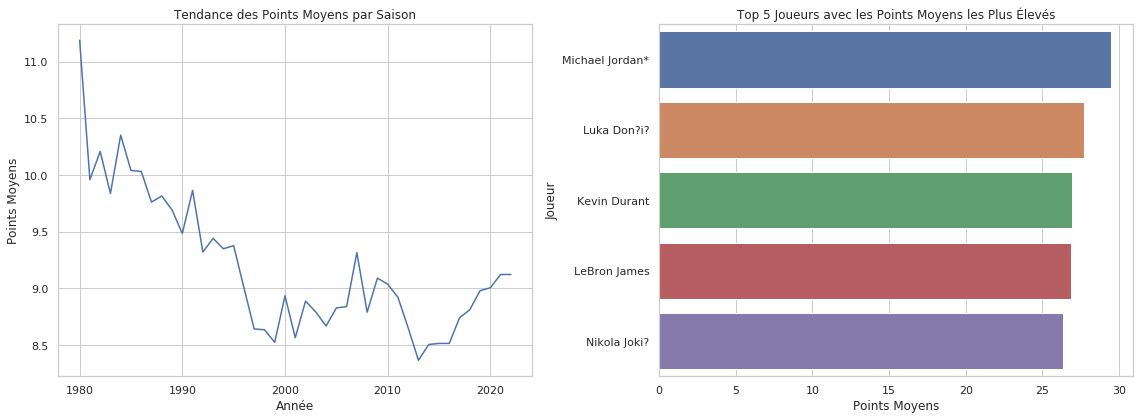

In [7]:
# PPG globaux pour chaque saison
season_trend_pts = stats.groupby('Year')['PTS'].mean().reset_index()



# Les 5 joueurs avec le total de PPG le plus élevé (sur toute la carrière)
top_players_pts = stats.groupby('Player')['PTS'].mean().reset_index().sort_values(by='PTS', ascending=False).head(5)



fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.lineplot(x='Year', y='PTS', data=season_trend_pts, ax=axes[0])
axes[0].set_title('Tendance des Points Moyens par Saison')
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Points Moyens')


sns.barplot(x='PTS', y='Player', data=top_players_pts, ax=axes[1])
axes[1].set_title('Top 5 Joueurs avec les Points Moyens les Plus Élevés')
axes[1].set_xlabel('Points Moyens')
axes[1].set_ylabel('Joueur')



plt.tight_layout()


Sans surprise, Michael Jordan domine cette statistique, avec Luka Doncic (un joueur relativement joueur) juste derrière lui. Il est cependant important de considérer l'ancienneté des joueurs pour pouvoir interpréter correctement ces statistiques. <br>

## 1.1 Influence de la position sur les variables

On peut ensuite comparer les PPG (ou d'autres statistiques) entre les différentes positions sur le terrain au Basket-ball (Meneur, ailier, arrière, pivot). Ce jeu de donnée est plus précis et incorpore des positions hybrides pour les joueurs "entre-deux". <br>

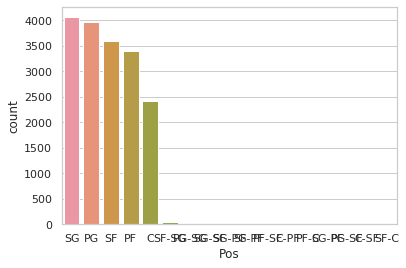

In [8]:
sns.countplot(data=stats, x='Pos', order=stats['Pos'].value_counts().index)

Les autres positions ne sont presque pas représentées, on peut les éliminer et continuer l'étude. <br>

In [9]:
positions_majeures = ['PG', 'SG', 'SF', 'PF', 'C']
stats = stats[stats['Pos'].isin(positions_majeures)]

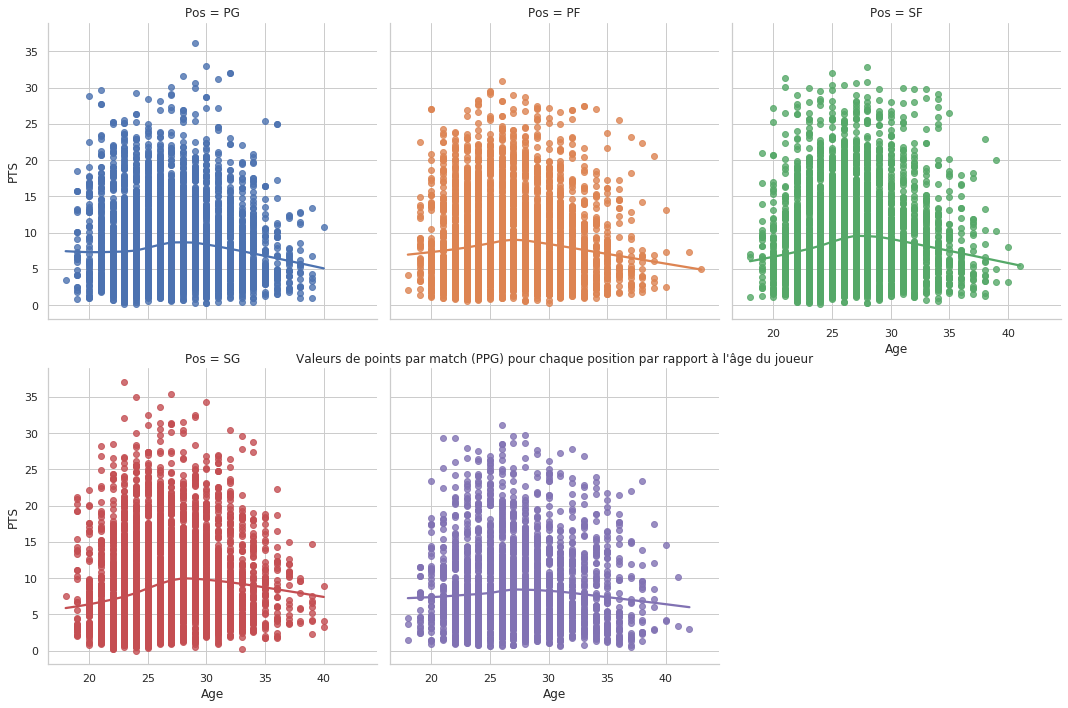

In [10]:
sns.lmplot( x="Age", y="PTS", data=stats, col = 'Pos', hue='Pos', col_wrap = 3, legend=False, lowess= True)
plt.title("Valeurs de points par match (PPG) pour chaque position par rapport à l'âge du joueur")
plt.show()

Il serait encore plus parlant de considérer une variable qui dépend naturellement beaucoup de la taille et de la position sur le terrain du joueur : les contres (BLK). <br>

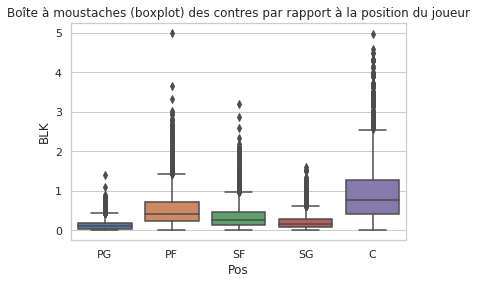

In [11]:
sns.boxplot(x="Pos", y="BLK", data=stats)
plt.title("Boîte à moustaches (boxplot) des contres par rapport à la position du joueur")
plt.show()

On peut voir naturellement que les contres sont plus présents chez les pivots (plus grands et plus proches du panier) que chez les meneurs. <br>

## 1.2 Corrélation

Ensuite, on peut examiner les corrélations pour chaque variables entre elles. <br>

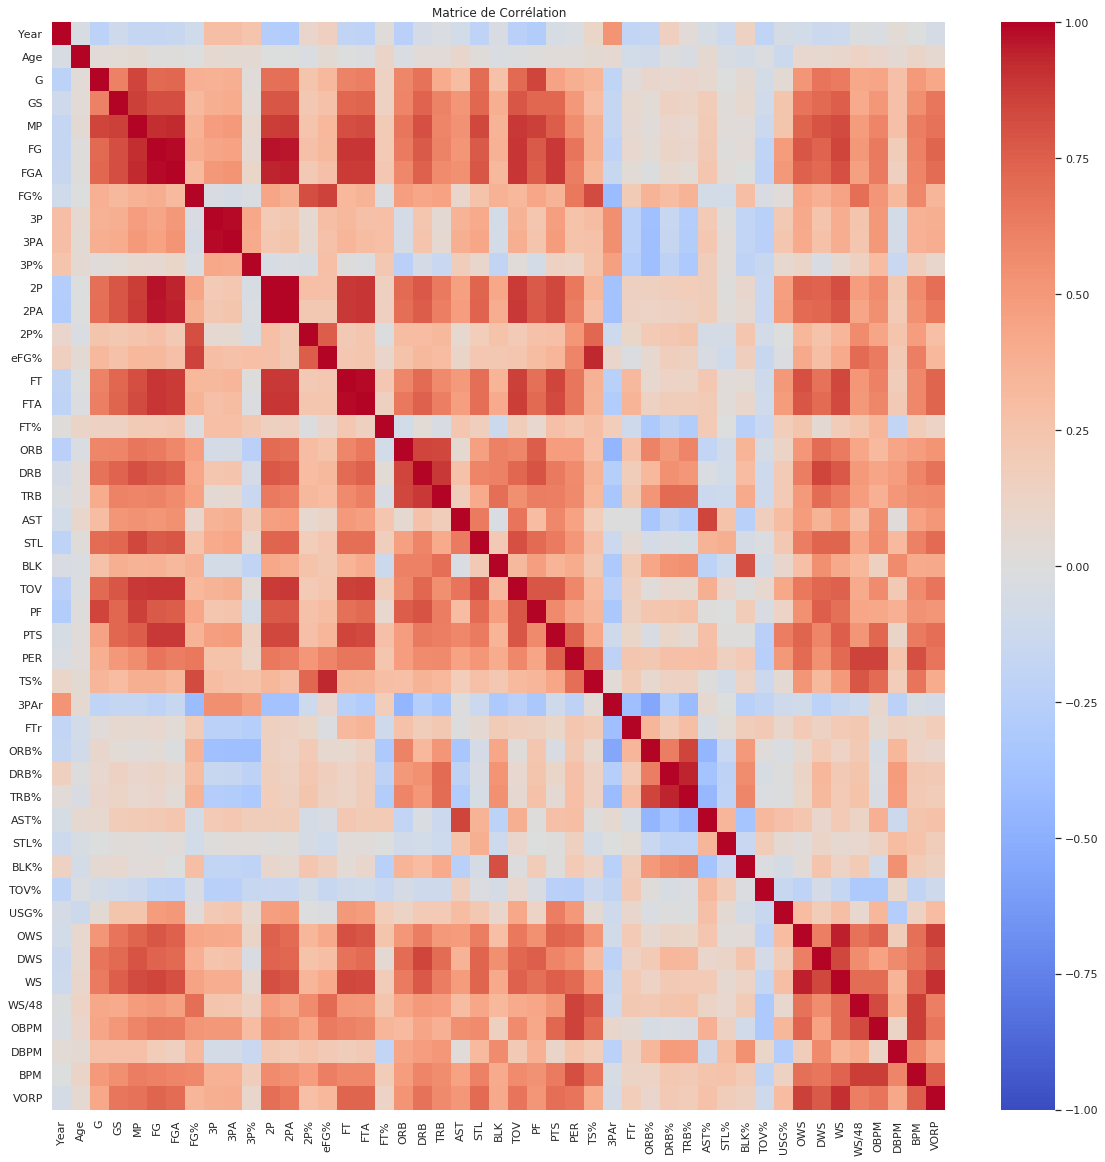

In [12]:
cor_mat = stats.corr(numeric_only = True)

plt.figure(figsize=(20, 20))
sns.heatmap(cor_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

## 1.3 Anomalies

Certaines observations sont des anomalies statistiques, on peut les identifier : <br>

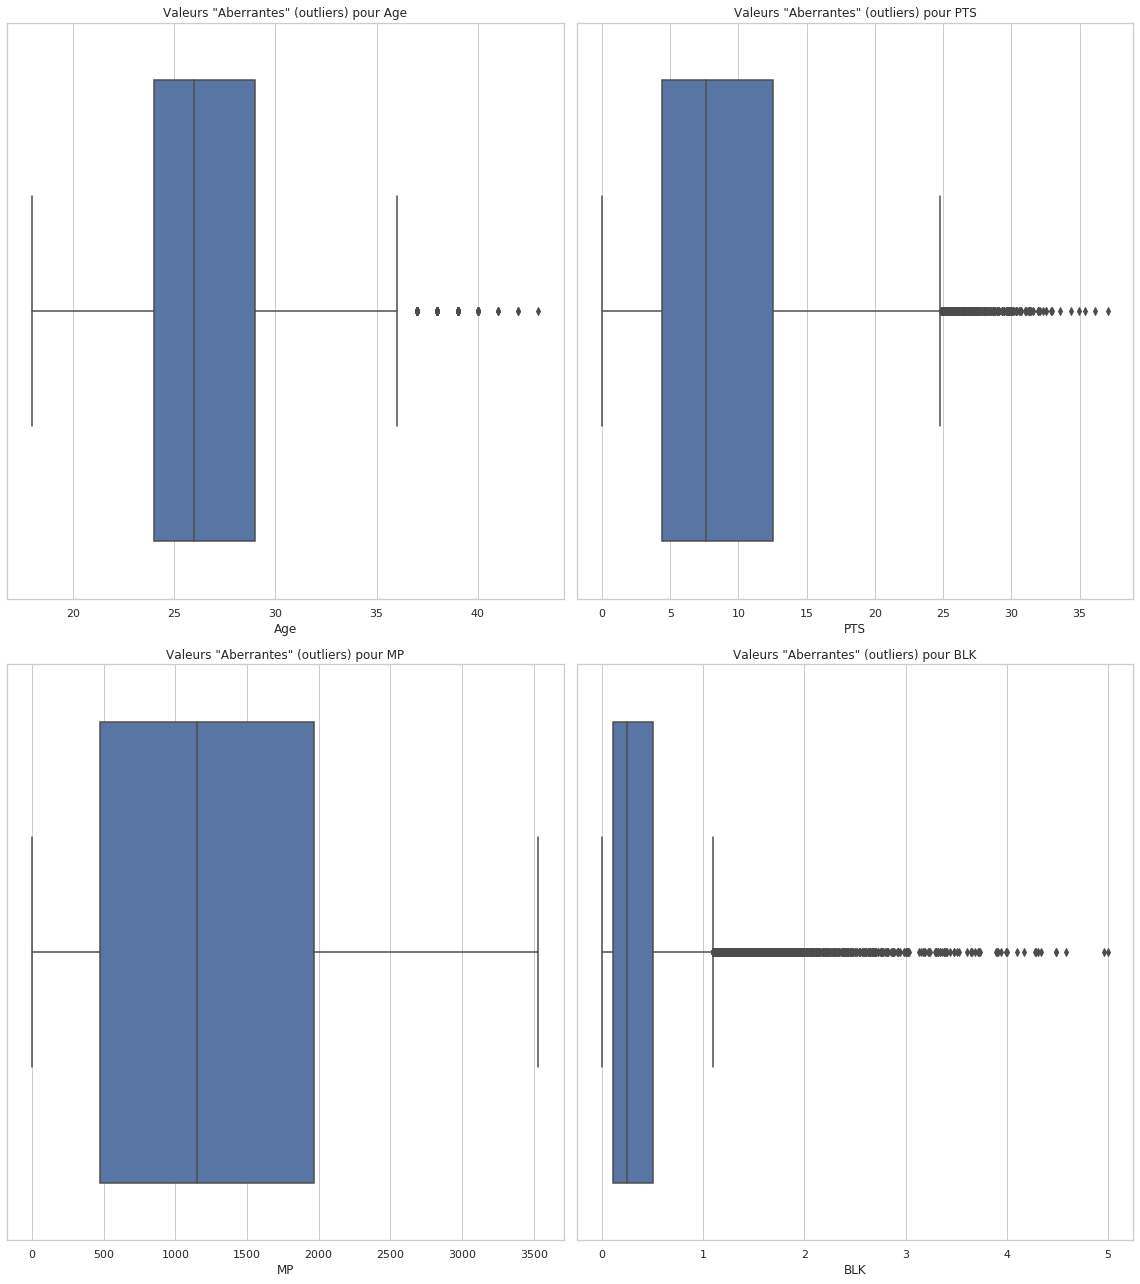

In [13]:
key_variables_outliers = ['Age', 'PTS', 'MP', 'BLK']


fig, axes = plt.subplots(2, 2, figsize=(16, 18))

for i, var in enumerate(key_variables_outliers):
    row = i // 2
    col = i % 2
    sns.boxplot(x=stats[var], ax=axes[row, col])
    axes[row, col].set_title(f'Valeurs "Aberrantes" (outliers) pour {var}')



plt.tight_layout()
plt.show()

On observe qu'il existe un grand nombre de valeurs que l'on peut considérer comme des "valeurs aberrantes". Seulement, compte tenu de la taille du jeu de données et du nombre de valeurs catégorisés comme tels, on peut conclure qu'il vaut mieux ne pas les éliminer. <br>

# 2. Algorithme de Machine Learning

Cette étude vise à prédire la note d'un joueur de NBA. On va d'abord fusionner les deux jeux de données. <br> 
Il est important de noter que les notes de NBA2K ne seront considérées qu'à partir de NBA2k15 (jeu de la saison de NBA 2014-2015). Avant cette saison, la méthodologie pour les notes était grandement différente. <br>

On pourrait déliminer arbitrairement un seuil au delà duquel la saison d'un joueur sera considérée comme une de ses meilleures puis appliquer un algorithme de classification. Seulement, un tel seuil serait hautement subjectif et l'étude n'en serait pas très intéressante (selon moi). J'ai donc choisi d'utiliser un modèle de Clustering (non supervisé) à l'étude. On pourrait généraliser l'étude à l'ensemble de la NBA ou simplement se focaliser sur un Joueur. <br>

In [14]:
nba_2k_ratings_df = pd.read_csv('../nba_2k_ratings_2014_to_2023.csv')

# On fusionne les jeux de données
merged_df = pd.merge(stats, nba_2k_ratings_df, left_on=['Player', 'Year'], right_on=['Player', 'Season'], how='inner')
merged_df.drop('Season', axis=1, inplace=True)


# Supprimer les lignes avec des valeurs manquantes et les colonnes non numériques
stats_merged = merged_df.dropna()
stats_merged_orig = stats_merged
stats_merged = stats_merged.drop(['Player', 'Pos', 'Tm', 'Id'], axis=1)
stats_merged

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Rating
0,2015,24.0,68,22.0,1287.0,152,331,0.459,18.0,60.0,...,15.5,1.0,0.7,1.7,0.063,-2.3,-0.8,-3.1,-0.3,67
1,2015,20.0,30,0.0,248.0,35,86,0.407,10.0,25.0,...,20.4,0.0,0.4,0.4,0.073,-1.8,1.2,-0.6,0.1,71
2,2015,21.0,70,67.0,1771.0,217,399,0.544,0.0,2.0,...,14.3,1.9,2.2,4.1,0.111,-1.4,1.8,0.4,1.1,74
3,2015,29.0,78,72.0,2502.0,375,884,0.424,118.0,333.0,...,19.0,1.6,1.0,2.6,0.050,-0.5,-1.3,-1.8,0.1,78
4,2015,29.0,53,53.0,1750.0,281,657,0.428,82.0,243.0,...,19.9,1.4,0.4,1.8,0.050,0.0,-1.6,-1.6,0.2,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,2022,28.0,27,8.0,696.0,104,225,0.462,33.0,83.0,...,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6,76
3537,2022,32.0,68,23.0,1652.0,370,662,0.559,12.0,45.0,...,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2,79
3538,2022,22.0,63,63.0,2125.0,487,1112,0.438,136.0,397.0,...,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0,89
3539,2022,28.0,48,21.0,1005.0,181,324,0.559,4.0,28.0,...,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4,78


On peut ensuite séparer le jeu de données en 2 : Entraînement (ici, tout avant 2023) et Test (l'année 2023) 

In [15]:
train_data = stats_merged[stats_merged['Year'] < 2022]
test_data = stats_merged[stats_merged['Year'] == 2022]



X_train = train_data.drop(columns = 'Rating', axis = 1)
y_train = train_data['Rating']
X_test = test_data.drop(columns = 'Rating', axis = 1)
y_test = test_data['Rating']

Avec ces données, on peut entraîner un modèle de régression (plus adapté pour cette étude). On utilise la métrique RMSE piur mesurer la distance moyenne entre les vrais échantillons et ceux prédits pour les données de test. <br>

Le premier modèle a considérer est le modèle de Régression Linéaire, qui peut sembler "naïf". S'il s'avère être le moins performant, il servira de baseline pour comparer nos autres modèles <br>

In [16]:
def train_model(nom, model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{nom} - RMSE: {sqrt(mse)}")

    
train_model("Régression Linéaire", LinearRegression(), X_train,y_train,X_test,y_test)

Régression Linéaire - RMSE: 2.444549549490148


La distance moyenne est de 2 pour notre jeu de données. Ce qui semble cohérent pour l'échelle des données. <br>
On utilise ensuite d'autres modèles.

In [17]:
train_model("Random Forest", RandomForestRegressor(), X_train,y_train,X_test,y_test)

train_model("Gradient Boost", GradientBoostingRegressor(), X_train,y_train,X_test,y_test)

Random Forest - RMSE: 2.271906478625176
Gradient Boost - RMSE: 2.1473240814302246


Le modèle Gradient Boost est un peu meilleur. On peut pousser l'étude un peu plus loin en essayant d'améliorer ce résultat. <br>

D'abord, on peut essayer de chercher le sous-ensemble des variables qui produisent le meilleur modèle. Il existe plusieurs façon de faire cela, ici, on utilise SHAP (SHapley Additive exPlanations). Cet algorithme a l'avantage de donner plus d'informations que les autres méthodes, qui ne donnent "que" l'importance de chaque variable. <br>

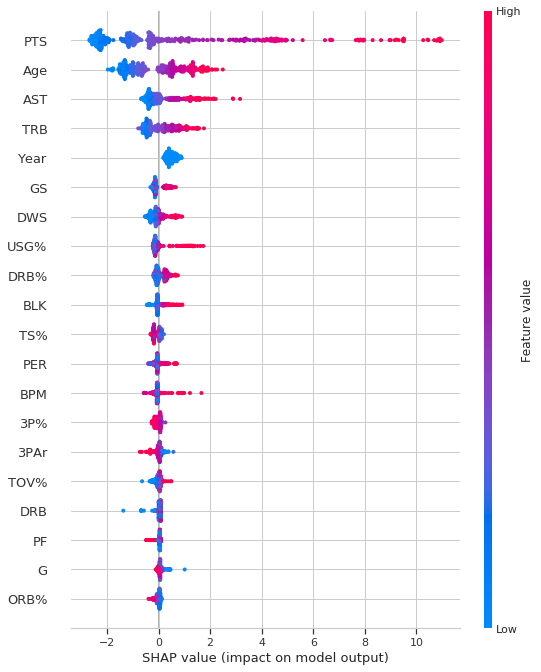

In [18]:
gbm = GradientBoostingRegressor()

gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
explainer = shap.Explainer(gbm)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

Plus une variable est haute dans le tableau, et plus elle est importante pour le modèle. Sur l'axe des abscisses, on retrouve l'impact qu'a chaque variable sur chaque prédiction. Un point représente donc l'impact qu'a eu une variable pour une prédiction donnée. <br>
On peut obtenir la valeur de chaque point, et notamment des points extremaux. Voici celle pour la variable PTS

In [19]:
feature_index = X_train.columns.tolist().index('PTS')

# On extrait les valeurs de SHAP pour la variable PTS
feature_shap_values = shap_values.values[:, feature_index]



max_shap_index = np.argmax(np.abs(feature_shap_values))
max_shap_value = feature_shap_values[max_shap_index]



# Extraction de la prédiction pour cette valeur de SHAP
max_shap_prediction = y_pred[max_shap_index]

original_index = X_test.index[max_shap_index]


# On lie ça au dataframe original 
player_name = stats_merged_orig.loc[original_index, 'Player']
saison = stats_merged_orig.loc[original_index, 'Year']

print(f" Joueur : {player_name}, valeur SHAP : {max_shap_value}, prédiction : {max_shap_prediction}, saison : {saison}")

 Joueur : Stephen Curry, valeur SHAP : 10.979431200208682, prédiction : 94.5721129441204, saison : 2022


Pendant cette saison 2021 - 2022, la variable qui a le plus influé dans la prédiction de la note de Stephen Curry est donc sa production offensive. Ceci semble logique au vu de son profil, très orienté sur sa capacité à mettre un grand nombre de paniers et sa position (Meneur de jeu). <br>

On peut donc passer à l'étude des sous-ensemble de variables.

In [20]:
# On calcule les valeurs absolues de SHAP 
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# On classe par valeurs SHAP
sorted_indices = np.argsort(mean_shap_values)[::-1]
k_results = {}

# Boucle pour choisir la valeur de k variable à choisir
for k in range(1,len(X_train.columns)): 
    gbmk = GradientBoostingRegressor()
    top_k_indices = sorted_indices[:k]
    col = X_train.columns[top_k_indices]
    X_train_selected = X_train[col]
    X_test_selected = X_test[col]
    gbmk.fit(X_train_selected, y_train)
    y_pred = gbmk.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    k_results[k] = sqrt(mse)

min_key = min(k_results, key=k_results.get)
min_value = k_results[min_key]

min_key, min_value

(22, 2.1019400442714127)

On peut voir qu'on obtient une meilleure valeur de RMSE avec un choix des 22 meilleures variables pour SHAP. Cependant, même si le résultat n'est meilleur que de façon marginal en termes de performances, il l'est bien plus au point de vu computationnel (2x moins de variables à traiter)

On peut ensuite chercher les meilleurs hyperparamètres avec une GridSearch

In [21]:
gbm = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

top_k_opt_indices = sorted_indices[:k]
col = X_train.columns[top_k_indices]

X_train_opt = X_train[col]
X_test_opt = X_test[col]


grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3)
grid_search.fit(X_train_opt, y_train)
best_params = grid_search.best_params_
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth']
)

train_model("Gradient Boost (Paramètres optimisés)", best_gb_model, X_train_opt,y_train,X_test_opt,y_test)

Gradient Boost (Paramètres optimisés) - RMSE: 2.137507440799601


 On observe que le modèle est un peu moins bon que précedemment (avec les valeurs par défaut donc), il faudrait pousser l'étude avec plus de choix d'hyperparamètres, mais l'étude est déjà longue et très inefficace au point de vue computationnel.

Enfin, on peut examiner de plus près certaines des fonctions de SHAP. 

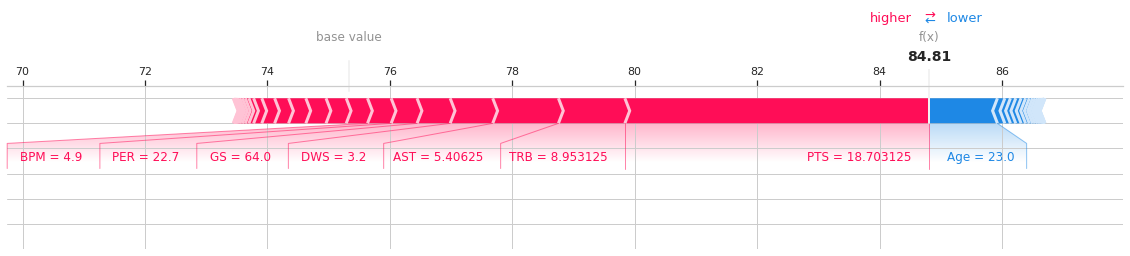

In [22]:
stats_merged_orig_test = stats_merged_orig[stats_merged_orig['Year'] == 2022]
lebron_index = stats_merged_orig_test[(stats_merged_orig_test['Player'] == 'Bam Adebayo')].index[0] - 3121

# Force plot de la librairie SHAP
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values.values[lebron_index],
    features=X_test.iloc[lebron_index],
    feature_names=X_test.columns,
    matplotlib=True
)

On peut voir que pour un joueur très défensif (Bam Adebayo), les rebonds et la contribution défensive du joueur sont des critères importants pour la décision de l'algorithme. 

# Conclusion

Nous avons rempli les objectifs que nous avions fixé au début de l'étude. Il est cependant important de constater qu'un travail plus poussé (mais plus demandé et intensif en temps de calcul) serait nécessaire pour optimiser encore plus les modèles que nous utilisons. <br>

Il est aussi crucial de souligner que les notes du jeu 2k ont une part de subjectivité importante et sont aussi soumises aux tendances de l'équipe et de la popularité du joueur qu'ils notent.